# Loan Payback

## Init

<div style="background-color:#161b22; color:#c9d1d9; border: 1px solid #30363d; padding: 15px; border-radius: 5px; margin: 20px 0;">
<h3 style="color:#58a6ff;">Imports</h3>
The imports for the code. There are not used because some were for testing.
<h3 style="color:#58a6ff;">Path</h3>
The path are my personals folders. Where i store data and results.
</div>

### Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostRegressor

### Path

In [2]:
data_folder = 'input/'
output_folder = 'output/'
plots_folder = 'output/plots/'

## Data Loading

### Loading data

In [3]:
train = pd.read_csv(data_folder + "train.csv")
test = pd.read_csv(data_folder + "test.csv")

In [4]:
train.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
print(train.isna().sum())
print(test.isna().sum())

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64
id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


In [6]:
train.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

### Data analysis

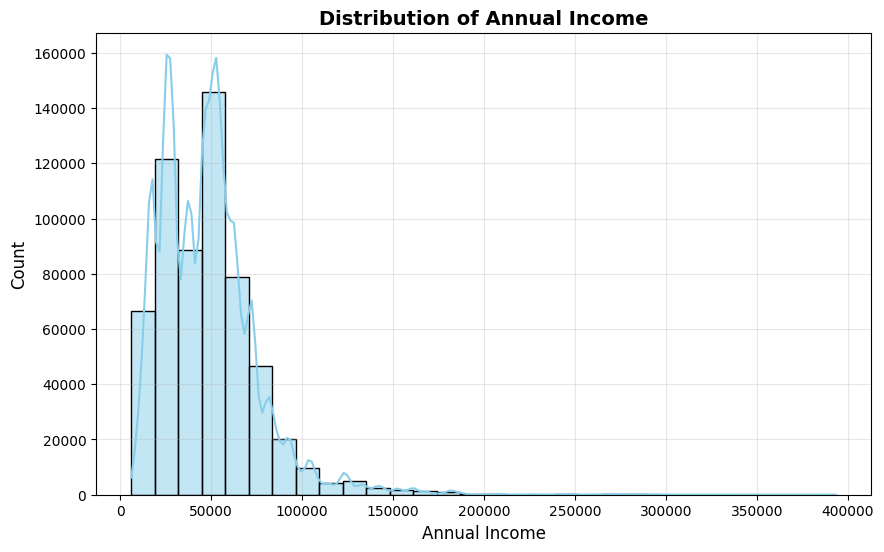


Summary Statistics:
Total data: 593994
Mean annual income: 48212.2
Median annual income: 46557.7
Max annual income: 393381.74
Min annual income: 6002.43
Number of null annual income: 0


In [7]:
annual_income = train['annual_income']

plt.figure(figsize=(10, 6))
sns.histplot(annual_income, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

print(f'\nSummary Statistics:')
print(f'Total data: {len(annual_income)}')
print(f'Mean annual income: {annual_income.mean():.1f}')
print(f'Median annual income: {annual_income.median():.1f}')
print(f'Max annual income: {annual_income.max()}')
print(f'Min annual income: {annual_income.min()}')
print(f'Number of null annual income: {annual_income.isnull().sum()}')

## PreProcessing

In [8]:
IDTrain = train['id']
id = test['id']

train.drop(['id'], axis=1)
test.drop(['id'], axis=1)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
...,...,...,...,...,...,...,...,...,...,...,...
254564,92835.97,0.068,744,29704.00,13.48,Female,Single,Bachelor's,Employed,Debt consolidation,B2
254565,48846.47,0.091,634,20284.33,9.58,Female,Married,High School,Employed,Debt consolidation,D4
254566,20668.52,0.096,718,26387.55,9.00,Male,Single,Master's,Employed,Debt consolidation,C4
254567,34105.09,0.094,739,11107.36,9.81,Male,Single,Bachelor's,Employed,Business,C2


In [9]:
print(train['gender'].unique())
print(train['marital_status'].unique())
print(train['education_level'].unique())
print(train['employment_status'].unique())
print(train['loan_purpose'].unique())
print(train['grade_subgrade'].unique())

['Female' 'Male' 'Other']
['Single' 'Married' 'Divorced' 'Widowed']
['High School' "Master's" "Bachelor's" 'PhD' 'Other']
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [10]:
# Création du OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Encodage
encoded = encoder.fit_transform(train[['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']])

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']))
encoded_df

# Encodage
encoded = encoder.fit_transform(test[['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']])

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_Test = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']))
encoded_df_Test

,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_Bachelor's,education_level_High School,education_level_Master's,...,employment_status_Student,employment_status_Unemployed,loan_purpose_Business,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254564,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254565,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254566,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254567,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


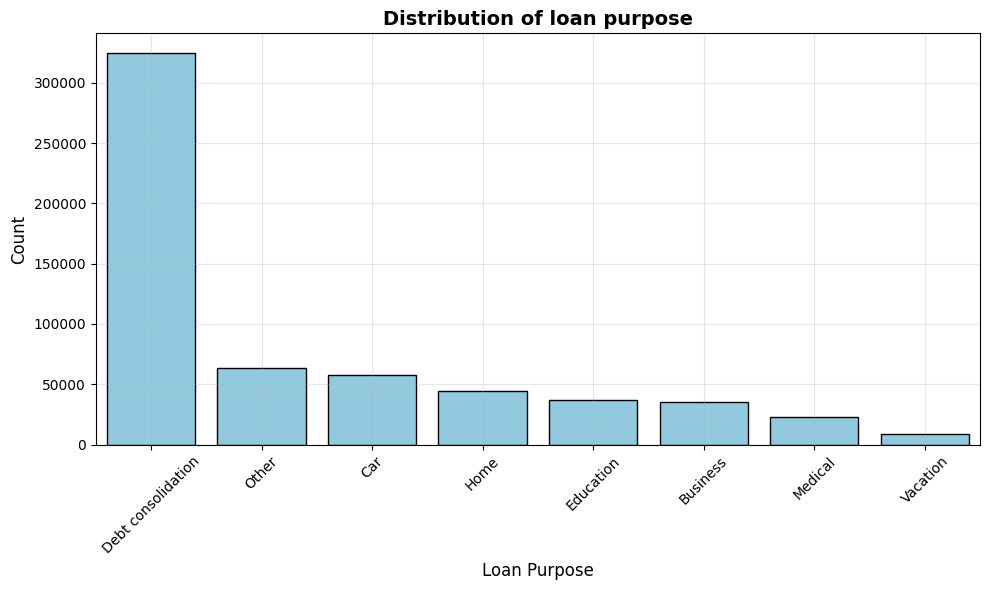

In [11]:
order = train['loan_purpose'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='loan_purpose', order=order, color='skyblue', edgecolor='black')
plt.title('Distribution of loan purpose', fontsize=14, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

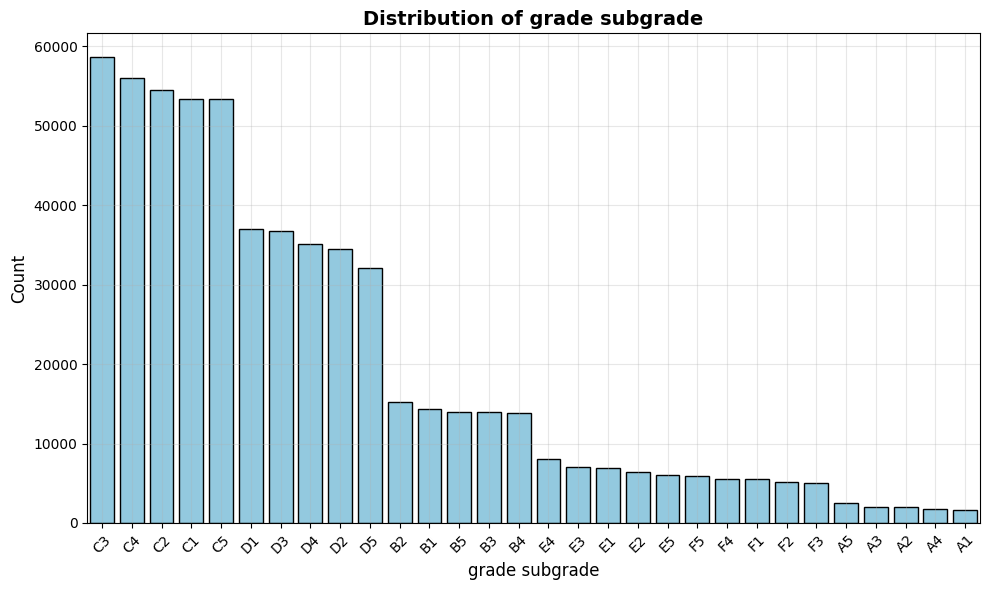

In [12]:
order = train['grade_subgrade'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='grade_subgrade', order=order, color='skyblue', edgecolor='black')
plt.title('Distribution of grade subgrade', fontsize=14, fontweight='bold')
plt.xlabel('grade subgrade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

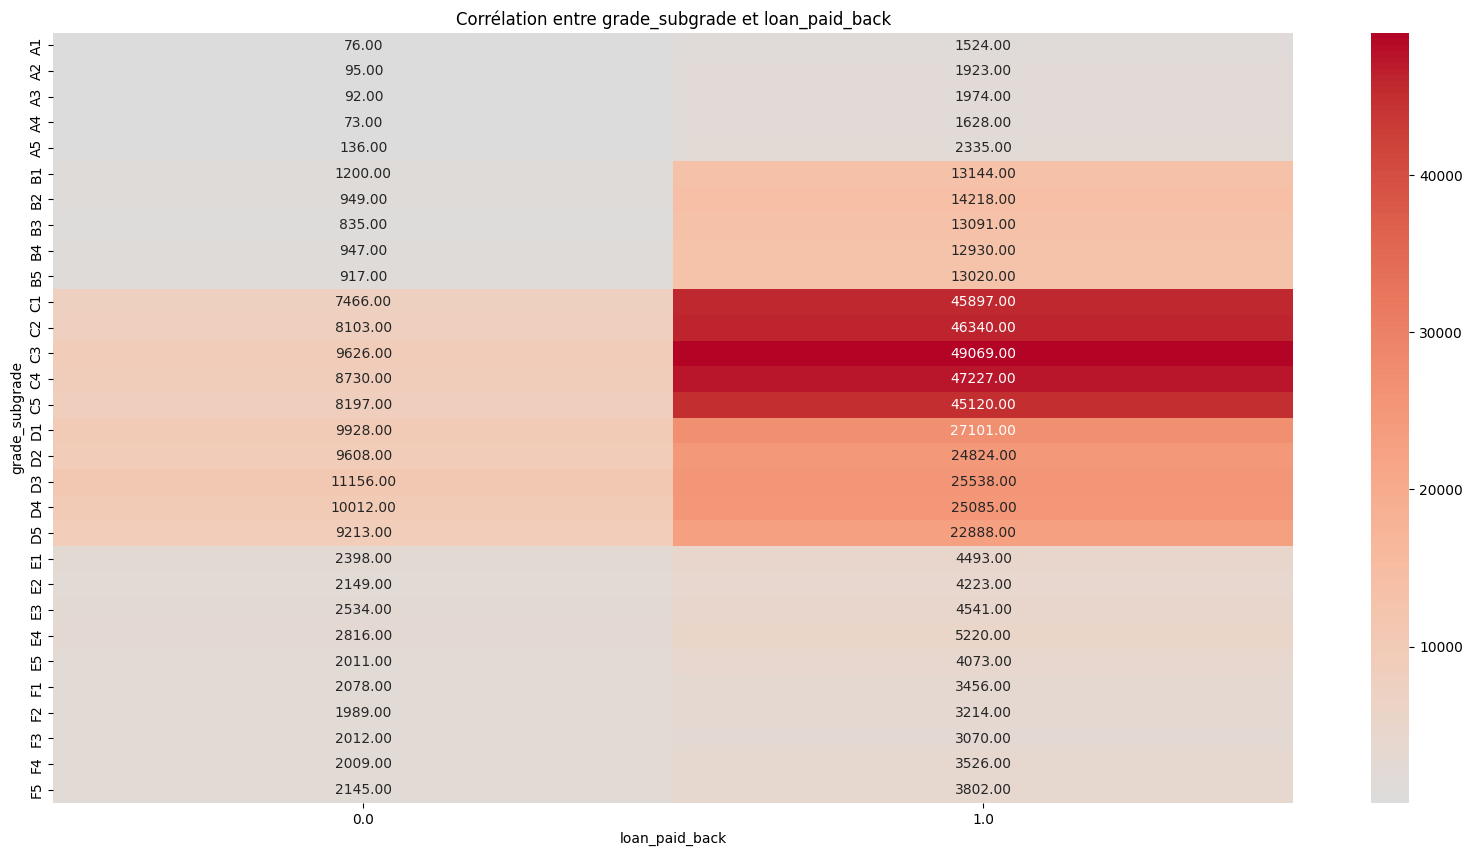

In [13]:
ct = pd.crosstab(train['grade_subgrade'], train['loan_paid_back'])
plt.figure(figsize=(20, 10))
sns.heatmap(ct, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Corrélation entre grade_subgrade et loan_paid_back")
plt.show()

In [14]:
grade_subgrade_train = []

for dataID in range(len(train)):
     match train.iloc[dataID]['grade_subgrade']:
        case "A1" | "A2" | "A3" | "A4" | "A5":
            grade_subgrade_train.append("A")
        case "B1" | "B2" | "B3" | "B4" | "B5":
            grade_subgrade_train.append("B")
        case "C1" | "C2" | "C3" | "C4" | "C5":
            grade_subgrade_train.append("C")
        case "D1" | "D2" | "D3" | "D4" | "D5":
            grade_subgrade_train.append("D")
        case "E1" | "E2" | "E3" | "E4" | "E5":
            grade_subgrade_train.append("E")
        case "F1" | "F2" | "F3" | "F4" | "F5":
            grade_subgrade_train.append("F")
        case _:
            grade_subgrade_train.append(None)

grade_subgrade_train = pd.DataFrame(grade_subgrade_train)
grade_subgrade_train.rename(columns={'0': 'grade_subgrade'}, inplace=True)

grade_subgrade_test = []

for dataID in range(len(test)):
     match test.iloc[dataID]['grade_subgrade']:
        case "A1" | "A2" | "A3" | "A4" | "A5":
            grade_subgrade_test.append("A")
        case "B1" | "B2" | "B3" | "B4" | "B5":
            grade_subgrade_test.append("B")
        case "C1" | "C2" | "C3" | "C4" | "C5":
            grade_subgrade_test.append("C")
        case "D1" | "D2" | "D3" | "D4" | "D5":
            grade_subgrade_test.append("D")
        case "E1" | "E2" | "E3" | "E4" | "E5":
            grade_subgrade_test.append("E")
        case "F1" | "F2" | "F3" | "F4" | "F5":
            grade_subgrade_test.append("F")
        case _:
            grade_subgrade_test.append(None)

grade_subgrade_test = pd.DataFrame(grade_subgrade_test)
grade_subgrade_test.rename(columns={'0': 'grade_subgrade'}, inplace=True)

In [15]:
grade_subgrade_test.shape

(254569, 1)

In [16]:
# Encoded
encoded = encoder.fit_transform(grade_subgrade_train)

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_grades = pd.DataFrame(encoded)

encoded_df_grades.columns = encoded_df_grades.columns.astype(str)

# Encoded
encoded = encoder.fit_transform(grade_subgrade_test)

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_grades_Test = pd.DataFrame(encoded)

encoded_df_grades_Test.columns = encoded_df_grades_Test.columns.astype(str)

encoded_df_grades_Test

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
254564,0.0,1.0,0.0,0.0,0.0,0.0
254565,0.0,0.0,0.0,1.0,0.0,0.0
254566,0.0,0.0,1.0,0.0,0.0,0.0
254567,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
NumberData = train[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']].copy()
NumberData_Test = test[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']].copy()

## Feature engineering

In [18]:
train.head(1)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0


In [19]:
newFeaturesTrain = pd.DataFrame()
newFeaturesTest = pd.DataFrame()

newFeaturesTrain['debt'] = train['debt_to_income_ratio'] * train['annual_income']
newFeaturesTest['debt'] = test['debt_to_income_ratio'] * test['annual_income']

newFeaturesTrain['interest_per_year'] = train['loan_amount'] * train['interest_rate']
newFeaturesTest['interest_per_year'] = test['loan_amount'] * test['interest_rate']

newFeaturesTrain['interest_per_month'] = (train['loan_amount'] * train['interest_rate']) / 12
newFeaturesTest['interest_per_month'] = (test['loan_amount'] * test['interest_rate']) / 12

newFeaturesTrain['loan_to_income'] = train['loan_amount'] / train['annual_income']
newFeaturesTest['loan_to_income'] = test['loan_amount'] / test['annual_income']

newFeaturesTrain['risk_score'] = (train['debt_to_income_ratio'] * 40 + 
                       (1 - train['credit_score']/850) * 30 + train['interest_rate'] * 2)
newFeaturesTest['risk_score'] = (test['debt_to_income_ratio'] * 40 + 
                      (1 - test['credit_score']/850) * 30 + test['interest_rate'] * 2)

newFeaturesTrain['credit_interest'] = train['credit_score'] * train['interest_rate'] / 100
newFeaturesTest['credit_interest'] = test['credit_score'] * test['interest_rate'] / 100

newFeaturesTrain['income_credit'] = np.log1p(train['annual_income']) * train['credit_score'] / 1000
newFeaturesTest['income_credit'] = np.log1p(test['annual_income']) * test['credit_score'] / 1000

newFeaturesTrain['debt_loan'] = train['debt_to_income_ratio'] * np.log1p(train['loan_amount'])
newFeaturesTest['debt_loan'] = test['debt_to_income_ratio'] * np.log1p(test['loan_amount'])

newFeaturesTrain['log_income'] = np.log1p(train['annual_income'])
newFeaturesTest['log_income'] = np.log1p(test['annual_income'])

newFeaturesTrain['log_loan'] = np.log1p(train['loan_amount'])
newFeaturesTest['log_loan'] = np.log1p(test['loan_amount'])

## Data merge

In [20]:
Data_Total_Train = pd.concat([NumberData, encoded_df, encoded_df_grades, newFeaturesTrain], axis=1)

Data_Total_Test = pd.concat([NumberData_Test, encoded_df_Test, encoded_df_grades_Test, newFeaturesTest], axis=1)
Data_Total_Test.shape

(254569, 46)

In [21]:
scaler = StandardScaler()

for i in Data_Total_Train.select_dtypes(include=np.number).columns.tolist():
    Data_Total_Train[i]=scaler.fit_transform(Data_Total_Train[[i]])

Data_Total_Train.head(5)

for i in Data_Total_Test.select_dtypes(include=np.number).columns.tolist():
    Data_Total_Test[i]=scaler.fit_transform(Data_Total_Test[[i]])

Data_Total_Test.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,...,debt,interest_per_year,interest_per_month,loan_to_income,risk_score,credit_interest,income_credit,debt_loan,log_income,log_loan
0,-0.728006,-1.043756,-0.989459,-0.513617,1.178469,0.967564,-0.955143,-0.080573,-0.192782,-0.93690,...,-0.889513,-0.181349,-0.181349,-0.079092,0.625172,0.746974,-1.155435,-1.043256,-0.656293,-0.179567
1,-0.060132,-0.402190,0.916193,0.068692,0.246668,0.967564,-0.955143,-0.080573,-0.192782,1.06735,...,-0.297456,0.147673,0.147673,-0.258872,-0.310853,0.906159,0.885230,-0.371777,0.202990,0.286810
2,0.251568,3.593019,-1.259127,-1.620933,0.464749,-1.033523,1.046963,-0.080573,-0.192782,-0.93690,...,2.906102,-1.468912,-1.468912,-0.976149,2.315769,-0.199087,-0.814022,2.880363,0.495706,-1.889425
3,-0.845389,-0.154312,-0.180456,-1.219629,-1.379028,0.967564,-0.955143,-0.080573,-0.192782,-0.93690,...,-0.604078,-1.333363,-1.333363,-0.465736,-0.918501,-1.659031,-0.610947,-0.265175,-0.861798,-1.039722
4,-0.863165,-0.577162,0.125167,0.387183,0.221886,0.967564,-0.955143,-0.080573,-0.192782,1.06735,...,-0.762345,0.446196,0.446196,0.751821,-0.152227,0.390668,-0.384833,-0.532280,-0.895096,0.492721


In [39]:
y_train_Total = train['loan_paid_back'].copy()

## Model fiting

### Params

In [ ]:
rf_params = {'random_state': 66, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'squared_error', 'bootstrap': True}
gb_params = {'subsample': 0.7, 'random_state': 42, 'n_estimators': 500, 'min_samples_split': 29, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.07}
ridge_params = {'scoring': 'neg_mean_squared_error', 'fit_intercept': True, 'cv': 10, 'alphas': [0.01, 0.1, 1.0, 10.0, 100.0]}

xgbr_params = {
    'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 5,
    'learning_rate': 0.01, 'n_estimators': 10000, 'colsample_bytree': 0.8,
    'subsample': 0.85, 'min_child_weight': 3, 'gamma': 0.05,
    'reg_alpha': 0.05, 'reg_lambda': 1.0, 'random_state': 42,
    'n_jobs': -1, 'device': 'cuda', 'tree_method': 'hist'
}

lgbc_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'max_depth': 6,
    'learning_rate': 0.05,
    'n_estimators': 5000,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_samples': 20, 
    'reg_alpha': 0.05,
    'reg_lambda': 0.2,
    'random_state': 42,
    'n_jobs': -1,
    'metric': 'auc'
}

lgbr_params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'n_estimators': 1320,
    'learning_rate': 0.05,
    'num_leaves': 93,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.975,
    'min_child_samples': 20,
    'reg_alpha': 2.95,
    'reg_lambda': 0.01,
    'random_state': 42,
    'metric': 'auc',
    'verbose': -1,
    'objective': 'binary',
    'boosting_type':'gbdt'
}

log_reg_params = {
    'penalty': 'l2',
    'C': 1.0,
    'solver': 'lbfgs',
    'max_iter': 1000,
    'fit_intercept': True,
    'class_weight': None,
    'random_state': 42,
    'n_jobs': -1,
    'tol': 1e-4,
    'l1_ratio': None
}


estimators = [
    #('knn', KNeighborsRegressor(**knn_params)),
    #('xgbr', XGBRegressor(**xgbr_params)),
    #('cat', CatBoostRegressor(**cat_params)),
    #('gb' , GradientBoostingRegressor(**gb_params)),
    #('lr', LinearRegression(**linear_params))
    #('rf', RandomForestRegressor(**rf_params))
    #('knn', knn_pipeline),                                 # !!! 1h model fitting
    #('bg_bagging', gb_pipeline)
    #('xrbg_bagging', xrgb_pipeline)
    #('cat_bagging', cat_pipeline)
    ('lrgb', LGBMRegressor(**lgbr_params))
]

NN = True

if(NN):
    model = keras.Sequential([
        layers.Input(shape=(Data_Total_Train.shape[1],)),
        layers.Dense(512), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
        layers.Dense(256), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
        layers.Dense(128), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.2),
        layers.Dense(64), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(0.001), 
                    loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='auc')])

    keras.backend.clear_session()
else:
    #model = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(**ridge_params))

    model = LGBMRegressor(**lgbr_params)

In [41]:
y_train_Total.shape

(593994,)

### Fold

In [ ]:
UseFold = True
NN = True
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

if (UseFold):

    for fold, (train_idx, val_idx) in enumerate(skf.split(Data_Total_Train, y_train_Total), 1):
        X_train, X_val = Data_Total_Train.iloc[train_idx], Data_Total_Train.iloc[val_idx]
        y_train, y_val = y_train_Total.iloc[train_idx], y_train_Total.iloc[val_idx]
        
        model = LGBMRegressor(**lgbr_params)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[])
        
else:
    if(NN):
        model = keras.Sequential([
            layers.Input(shape=(Data_Total_Train.shape[1],)),
            layers.Dense(512), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
            layers.Dense(256), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
            layers.Dense(128), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.2),
            layers.Dense(64), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=keras.optimizers.Adam(0.001), 
                        loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='auc')])

        keras.backend.clear_session()
    else:
        model = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(**ridge_params))
    model.fit(Data_Total_Train, y_train_Total)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 406709, number of negative: 102428
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3917
[LightGBM] [Info] Number of data points in the train set: 509137, number of used features: 46
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798820 -> initscore=1.378938
[LightGBM] [Info] Start training from score 1.378938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

## Prediction

In [44]:
prediction = model.predict(Data_Total_Test)

In [45]:
Data_Total_Test.shape

(254569, 46)

In [ ]:
filename = output_folder + 'submission_Fold_lgbr.csv'

pred = []
for i in prediction:
    pred.append(round(i, 3))

submission = pd.DataFrame({
    'id': id,
    'loan_paid_back': pred
})

submission.to_csv(filename, index=False)
print(f"Saved: {filename}")

Saved: output/submission_Fold_lgbc.csv
